In [192]:
# Import Packages
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rc
rc('text', usetex=False)
plt.style.use('ggplot')

import numpy  as np
import pandas as pd
from scipy import stats

from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV, RidgeCV, ElasticNetCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
import sklearn


In [193]:
combine = pd.read_csv('fulldataset.csv') # cleaned and processed data set
df = pd.read_csv('fulldataset_wdummy.csv') # dummified data set
pd.set_option('display.max_columns', None) 

print(df.shape)
df.info()


(2903, 296)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2903 entries, 0 to 2902
Columns: 296 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(22), int64(274)
memory usage: 6.6 MB


In [194]:
y = combine['SalePrice'].dropna()
newtrain = df[:1444]
newtest = df[1444:]
newtest.shape, newtrain.shape, y.shape

((1459, 296), (1444, 296), (1444,))

In [195]:
# Execute train, test, split for Linear model with Ridge, Lasso, and ElasticNet
X_train,X_test,y_train,y_test = train_test_split(newtrain, y, test_size = .30, random_state= 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((1010, 296), (434, 296), (1010,), (434,))

### Ridge

In [199]:
ridge = Ridge()
ridge.set_params(alpha = 0.1, normalize=True)
ridge.fit(X_train, y_train)
print("Ridge train score: ", ridge.score(X_train, y_train))
print('RSS is equal to %.3f' %(np.sum((y_train-ridge.predict(X_train))**2)))
print('the ridge intercept is: %.2f' %(ridge.intercept_))
pd.Series(ridge.coef_, index=X_train.columns)

Ridge train score:  0.9306431553028232
RSS is equal to 379454280465.223
the ridge intercept is: -607341.05


LotFrontage                 94.167549
LotArea                      0.529758
LotShape                   -85.938270
OverallQual               7160.894812
YearBuilt                   85.042570
                             ...     
SaleCondition_AdjLand    10152.038053
SaleCondition_Alloca     -1892.439642
SaleCondition_Family     -7766.186366
SaleCondition_Normal      5485.490077
SaleCondition_Partial     2591.158236
Length: 296, dtype: float64

In [200]:
print("Ridge test score: ", ridge.score(X_test, y_test))

Ridge test score:  0.8989453261129763


In [201]:
alphaRange = np.linspace(1e-3,10,30)
ridge.set_params(normalize=True)
coefs  = []
scores = []
for alpha in alphaRange:
        ridge.set_params(alpha=alpha, normalize=True)
        ridge.fit(X_train, y_train)  
        coefs.append(ridge.coef_)
        scores.append(ridge.score(X_train, y_train))
coefs = pd.DataFrame(coefs, index = alphaRange, columns = X_train.columns)  
coefs.head()


,LotFrontage,LotArea,LotShape,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,HeatingQC,CentralAir,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,MoSold,TotalBaths,PorchSF,TotalSF,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageYrBlt_1896.0,GarageYrBlt_1900.0,GarageYrBlt_1906.0,GarageYrBlt_1908.0,GarageYrBlt_1910.0,GarageYrBlt_1914.0,GarageYrBlt_1915.0,GarageYrBlt_1916.0,GarageYrBlt_1917.0,GarageYrBlt_1918.0,GarageYrBlt_1919.0,GarageYrBlt_1920.0,GarageYrBlt_1921.0,GarageYrBlt_1922.0,GarageYrBlt_1923.0,GarageYrBlt_1924.0,GarageYrBlt_1925.0,GarageYrBlt_1926.0,GarageYrBlt_1927.0,GarageYrBlt_1928.0,GarageYrBlt_1929.0,GarageYrBlt_1930.0,GarageYrBlt_1931.0,GarageYrBlt_1932.0,GarageYrBlt_1933.0,GarageYrBlt_1934.0,GarageYrBlt_1935.0,GarageYrBlt_1936.0,GarageYrBlt_1937.0,GarageYrBlt_1938.0,GarageYrBlt_1939.0,GarageYrBlt_1940.0,GarageYrBlt_1941.0,GarageYrBlt_1942.0,GarageYrBlt_1943.0,GarageYrBlt_1945.0,GarageYrBlt_1946.0,GarageYrBlt_1947.0,GarageYrBlt_1948.0,GarageYrBlt_1949.0,GarageYrBlt_1950.0,GarageYrBlt_1951.0,GarageYrBlt_1952.0,GarageYrBlt_1953.0,GarageYrBlt_1954.0,GarageYrBlt_1955.0,GarageYrBlt_1956.0,GarageYrBlt_1957.0,GarageYrBlt_1958.0,GarageYrBlt_1959.0,GarageYrBlt_1960.0,GarageYrBlt_1961.0,GarageYrBlt_1962.0,GarageYrBlt_1963.0,GarageYrBlt_1964.0,GarageYrBlt_1965.0,GarageYrBlt_1966.0,GarageYrBlt_1967.0,G

Text(0.5, 1.0, 'Change of Ridge Slopes Varying Alpha')

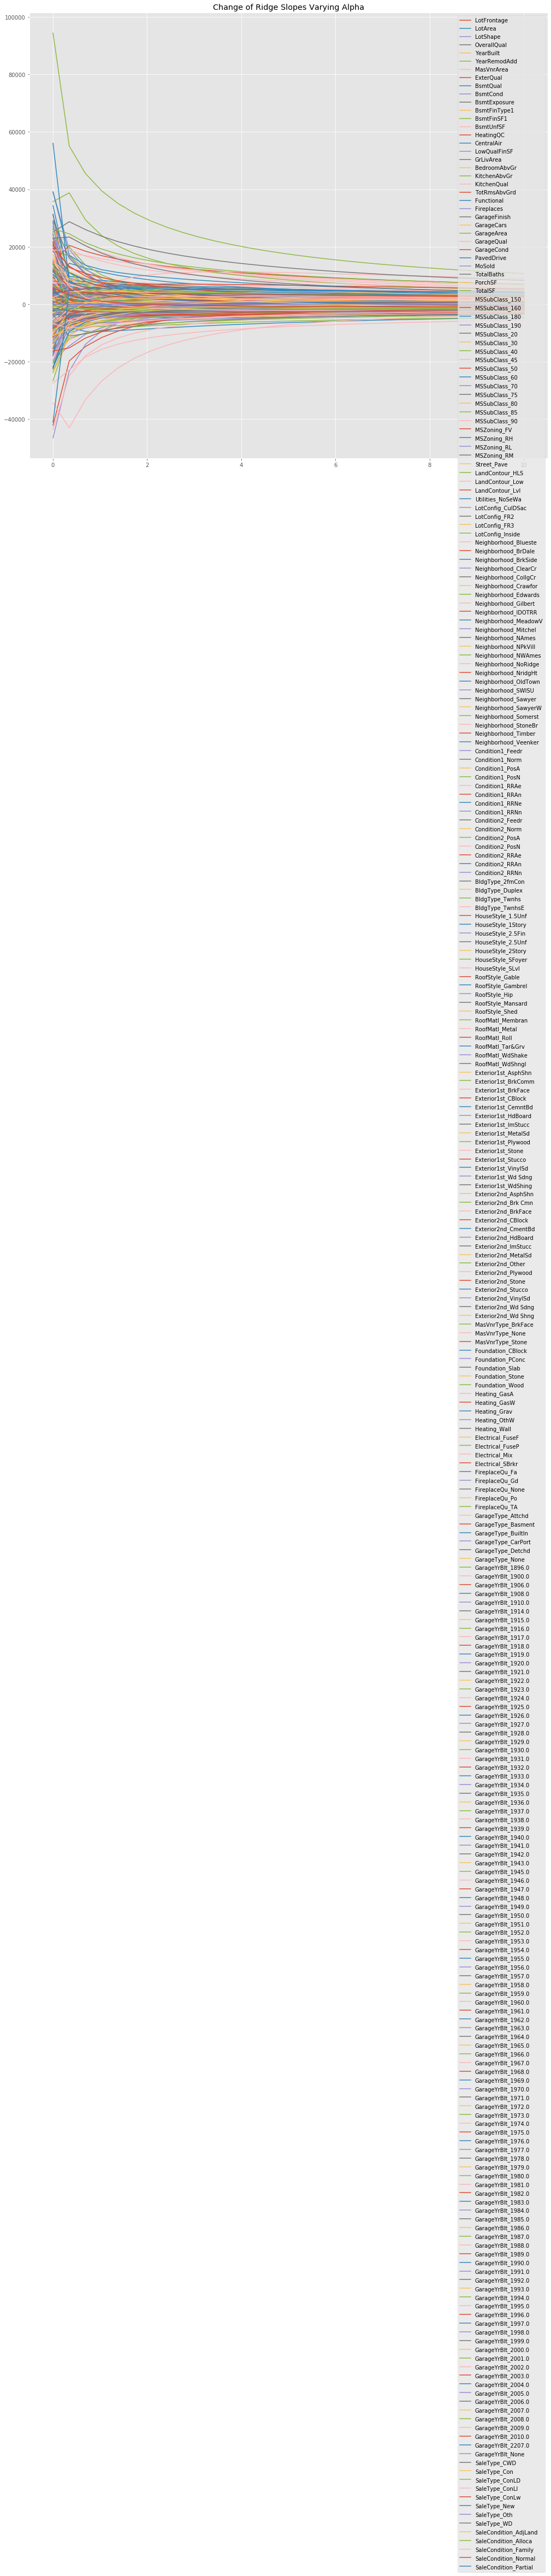

In [202]:
# Use visualization to narrow down the range of alpha to do cross validation
f, ax = plt.subplots(figsize=(17, 15))
for name in coefs.columns:
    plt.plot(alphaRange, coefs[name], label=name)
plt.legend(loc=1)    
plt.title('Change of Ridge Slopes Varying Alpha')

#### Ridge Cross Validation

In [203]:
ridge_cv = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1],cv=10)
ridge_cv.fit(X_train,y_train)
ridge_bestalpha=round(ridge_cv.alpha_,3)

# Best alpha value according to ridge cross validation
ridge_bestalpha 

1.0

#### Fitting a Linear Regression Model with Ridge at 1

In [211]:
ridge.set_params(alpha = 1, normalize=True)
ridge.fit(X_train, y_train)
print("Ridge train score: ", ridge.score(X_train, y_train))
print('RSS is equal to %.3f' %(np.sum((y_train-ridge.predict(X_train))**2)))
print("Ridge test score: ", ridge.score(X_test, y_test))

Ridge train score:  0.8962558345412147
RSS is equal to 567588791394.815
Ridge test score:  0.8894098151937327


### Lasso

In [205]:
lasso.set_params(alpha = 0.1, normalize=True)
lasso.fit(X_train, y_train)
# print('the ridge intercept is: %.2f' %(ridge.intercept_))
# pd.Series(ridge.coef_, index=x_train.columns)
print("Lasso train score: ", lasso.score(X_train, y_train))
print("Lasso test score: ", lasso.score(X_test, y_test))

Lasso train score:  0.9358650088730873
Lasso test score:  0.8828021419221711


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1110217209.222229, tolerance: 547104301.1284357
  positive)


In [206]:
lasso  = Lasso()
alphaRange = np.linspace(1e-3,20,20)
lasso.set_params(normalize=True) 
coefs_lasso  = []
scores = []

for alpha in alphaRange:
        lasso.set_params(alpha=alpha)
        lasso.fit(X_train, y_train)  
        coefs_lasso.append(lasso.coef_)
        scores.append(lasso.score(X_train, y_train))

coefs_lasso = pd.DataFrame(coefs_lasso, index = alphaRange, columns = X_train.columns)  
coefs_lasso.head()

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 156950657849.31537, tolerance: 547104301.1284357
  positive)


,LotFrontage,LotArea,LotShape,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,HeatingQC,CentralAir,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,MoSold,TotalBaths,PorchSF,TotalSF,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageYrBlt_1896.0,GarageYrBlt_1900.0,GarageYrBlt_1906.0,GarageYrBlt_1908.0,GarageYrBlt_1910.0,GarageYrBlt_1914.0,GarageYrBlt_1915.0,GarageYrBlt_1916.0,GarageYrBlt_1917.0,GarageYrBlt_1918.0,GarageYrBlt_1919.0,GarageYrBlt_1920.0,GarageYrBlt_1921.0,GarageYrBlt_1922.0,GarageYrBlt_1923.0,GarageYrBlt_1924.0,GarageYrBlt_1925.0,GarageYrBlt_1926.0,GarageYrBlt_1927.0,GarageYrBlt_1928.0,GarageYrBlt_1929.0,GarageYrBlt_1930.0,GarageYrBlt_1931.0,GarageYrBlt_1932.0,GarageYrBlt_1933.0,GarageYrBlt_1934.0,GarageYrBlt_1935.0,GarageYrBlt_1936.0,GarageYrBlt_1937.0,GarageYrBlt_1938.0,GarageYrBlt_1939.0,GarageYrBlt_1940.0,GarageYrBlt_1941.0,GarageYrBlt_1942.0,GarageYrBlt_1943.0,GarageYrBlt_1945.0,GarageYrBlt_1946.0,GarageYrBlt_1947.0,GarageYrBlt_1948.0,GarageYrBlt_1949.0,GarageYrBlt_1950.0,GarageYrBlt_1951.0,GarageYrBlt_1952.0,GarageYrBlt_1953.0,GarageYrBlt_1954.0,GarageYrBlt_1955.0,GarageYrBlt_1956.0,GarageYrBlt_1957.0,GarageYrBlt_1958.0,GarageYrBlt_1959.0,GarageYrBlt_1960.0,GarageYrBlt_1961.0,GarageYrBlt_1962.0,GarageYrBlt_1963.0,GarageYrBlt_1964.0,GarageYrBlt_1965.0,GarageYrBlt_1966.0,GarageYrBlt_1967.0,G

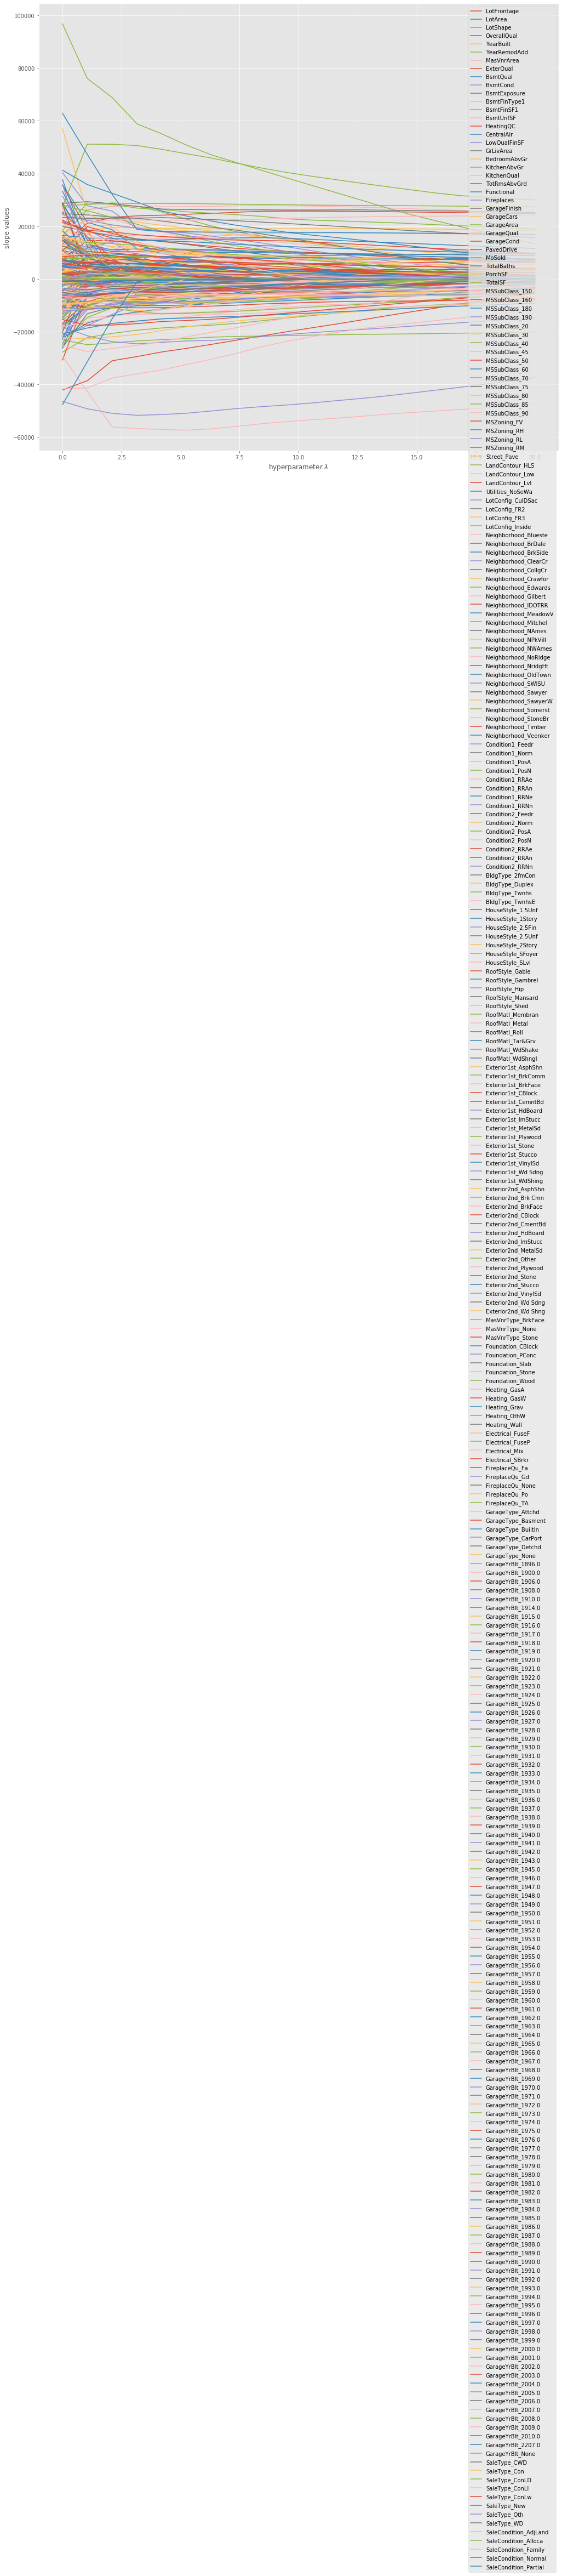

In [207]:
# Use visualization to narrow down the range of alpha to do cross validation
f, ax = plt.subplots(figsize=(17, 15))
for name in coefs.columns:
    plt.plot(coefs_lasso.index, coefs_lasso[name], label=name)
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'slope values')
plt.legend(loc=1)   
# This does not show you where the hyperparameter should be

#### Lasso Cross Validation

In [208]:
lasso_cv = LassoCV(alphas=[1e-3, 1e-2, 1e-3, 1, 2],cv=10)
lasso_cv.fit(X_train,y_train)
lasso_bestalpha=round(lasso_cv.alpha_,3)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 84628281760.46005, tolerance: 466861504.80234456
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 64218617438.431, tolerance: 466861504.80234456
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 130965622947.43225, tolerance: 466861504.80234456
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You mi

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 124119434451.16473, tolerance: 487837062.72131974
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 115675228970.30225, tolerance: 487837062.72131974
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 157328900661.22714, tolerance: 487837062.72131974
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. Yo

In [209]:
# Best alpha value according to ridge cross validation
lasso_bestalpha

2.0

#### Fitting a Linear Regression Model with Lasso at 2

In [221]:
lasso.set_params(alpha = 2, normalize=True)
lasso.fit(X_train, y_train)
print("Lasso train score: ", lasso.score(X_train, y_train))
print('RSS is equal to %.3f' %(np.sum((y_train-lasso.predict(X_train))**2)))
print("Lasso test score: ", lasso.score(X_test, y_test))

Lasso train score:  0.9338357868085843
RSS is equal to 361987256178.024
Lasso test score:  0.8933484060653434


In [222]:
lasso_coefs = pd.Series(lasso.coef_, index=X_train.columns)
lasso_coefs = np.abs(lasso_coefs).sort_values(ascending=False)
zero_coefs = lasso_coefs[lasso_coefs.values==0]

In [216]:
# Lasso indicates that there are 51 features with 0 coefficients
# We can possibly drop some of these
print(len(zero_coefs))
print(zero_coefs)

51
Condition1_PosA         0.0
Neighborhood_Somerst    0.0
Exterior2nd_Other       0.0
GarageFinish            0.0
HouseStyle_SFoyer       0.0
Exterior2nd_CBlock      0.0
Neighborhood_Sawyer     0.0
Neighborhood_SawyerW    0.0
GarageYrBlt_1999.0      0.0
GarageYrBlt_2000.0      0.0
SaleCondition_Alloca    0.0
SaleType_Oth            0.0
LowQualFinSF            0.0
Exterior2nd_Brk Cmn     0.0
Exterior1st_VinylSd     0.0
GarageYrBlt_1973.0      0.0
RoofStyle_Hip           0.0
Exterior1st_CemntBd     0.0
Exterior1st_CBlock      0.0
GarageYrBlt_2207.0      0.0
RoofMatl_Roll           0.0
GarageYrBlt_1917.0      0.0
PavedDrive              0.0
Exterior2nd_Plywood     0.0
GarageYrBlt_1918.0      0.0
Utilities_NoSeWa        0.0
GarageYrBlt_1896.0      0.0
GarageYrBlt_1919.0      0.0
LandContour_HLS         0.0
GarageYrBlt_1933.0      0.0
MSZoning_RM             0.0
GarageYrBlt_1934.0      0.0
GarageType_Attchd       0.0
HouseStyle_2Story       0.0
GarageYrBlt_1943.0      0.0
GarageYrBlt_1947.

In [218]:
# These are features that have coefficients greater than 0 at alpha 2
significant_feat = lasso_coefs[lasso_coefs.values>0].sort_values(ascending=False)
significant_feat

Condition2_PosA       70011.735707
GarageYrBlt_1900.0    56041.712639
RoofMatl_Membran      51085.622420
Heating_OthW          50759.972645
GarageYrBlt_1924.0    37763.846052
                          ...     
GarageArea               18.138738
BsmtFinSF1               12.284798
MasVnrArea               10.638705
BsmtUnfSF                 7.180716
LotArea                   0.592352
Length: 245, dtype: float64

### ElasticNet

In [223]:
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5, normalize=True)
elasticnet.fit(X_train, y_train)
print(r'The R^2 is %.2f' %(elasticnet.score(X_train, y_train)))
print('RSS is equal to %.3f' %(np.sum((y_train-elasticnet.predict(X_train))**2)))
print("R^2 for test is %.2f" %(elasticnet.score(X_test, y_test)))
# elasticnet.coef_,  elasticnet.intercept_

The R^2 is 0.32
RSS is equal to 3725060647916.998
R^2 for test is 0.32


#### Cross Validation with ElasticNet

In [224]:
rhoRange = np.linspace(0.1,1, 10)
elasticnet_cv = ElasticNetCV(l1_ratio=rhoRange, eps=0.001, n_alphas=100, alphas=[1e-3, 1e-2, 1e-3, 1, 2], cv=10)
elasticnet_cv.fit(X_train, y_train)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 786542148.3400269, tolerance: 512230217.1056148
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1055845577.5807495, tolerance: 496095529.4442059
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4020495399.4990234, tolerance: 512230217.1056148
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You mi

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 154710649104.56174, tolerance: 496095529.4442059
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 162318265216.9663, tolerance: 512230217.1056148
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 163681692942.5656, tolerance: 492737532.6996555
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You mig

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 72929765287.87653, tolerance: 493171002.4604217
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 142593671636.06073, tolerance: 493171002.4604217
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 150297343026.95386, tolerance: 493171002.4604217
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You mi

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 152050449579.35977, tolerance: 492796782.25581485
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 152096008042.8824, tolerance: 492796782.25581485
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 151998294279.16904, tolerance: 492796782.25581485
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You

ElasticNetCV(alphas=[0.001, 0.01, 0.001, 1, 2], copy_X=True, cv=10, eps=0.001,
             fit_intercept=True,
             l1_ratio=array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
             max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
             positive=False, precompute='auto', random_state=None,
             selection='cyclic', tol=0.0001, verbose=0)

In [185]:
print(round(elasticnet_cv.alpha_,3)) # Best alpha value
print(round(elasticnet_cv.l1_ratio_,3)) # Best rho value


0.01
0.1


In [225]:
# elasticnet = ElasticNet(alpha=0.01, l1_ratio=0.1, normalize=True)
# elasticnet.fit(X_train, y_train)
print(r'The R^2 is %.2f' %(elasticnet_cv.score(X_train, y_train)))
print('RSS is equal to %.3f' %(np.sum((y_train-elasticnet_cv.predict(X_train))**2)))
print("R^2 for test is %.2f" %(elasticnet_cv.score(X_test, y_test)))

The R^2 is 0.92
RSS is equal to 414341916351.925
R^2 for test is 0.91


In [226]:
predictions = elasticnet_cv.predict(newtest)
newtest.loc[:, 'SalePrice'] = predictions
predictions = pd.Series(predictions)
predictions.shape

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


(1459,)

In [227]:
id_no = pd.Series(range(1461,2920))
ElasticNetPred = pd.concat([id_no,predictions],axis=1)
ElasticNetPred.columns = ['Id','SalePrice']

In [228]:
ElasticNetPred = ElasticNetPred.dropna()
ElasticNetPred.to_csv('ElasticNetPred.csv', index=False)

In [229]:
ElasticNetPred.head()

,Id,SalePrice
0,1461,112570.670946
1,1462,174600.212371
2,1463,183851.894119
3,1464,194150.628868
4,1465,202399.152460
